In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vehiculos = pd.read_csv("./Data/vehiculos_procesado_con_grupos.csv").drop(
            ["fabricante", "modelo", "transmision", "traccion", "clase", "combustible", "consumo"], 
    axis=1)

In [3]:
vehiculos.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


In [4]:
vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  36791 non-null  int64  
 1   desplazamiento        36789 non-null  float64
 2   cilindros             36788 non-null  float64
 3   co2                   36791 non-null  float64
 4   clase_tipo            36791 non-null  object 
 5   traccion_tipo         36791 non-null  object 
 6   transmision_tipo      36791 non-null  object 
 7   combustible_tipo      36791 non-null  object 
 8   tamano_motor_tipo     36789 non-null  object 
 9   consumo_tipo          36791 non-null  object 
 10  co2_tipo              36791 non-null  object 
 11  consumo_litros_milla  36791 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 3.4+ MB


In [5]:
datos_numericos=vehiculos.select_dtypes(include=[int,float])
datos_categoricos=vehiculos.select_dtypes(include=[object,"category"])

In [6]:
datos_numericos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  36791 non-null  int64  
 1   desplazamiento        36789 non-null  float64
 2   cilindros             36788 non-null  float64
 3   co2                   36791 non-null  float64
 4   consumo_litros_milla  36791 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.4 MB


In [7]:
datos_categoricos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   clase_tipo         36791 non-null  object
 1   traccion_tipo      36791 non-null  object
 2   transmision_tipo   36791 non-null  object
 3   combustible_tipo   36791 non-null  object
 4   tamano_motor_tipo  36789 non-null  object
 5   consumo_tipo       36791 non-null  object
 6   co2_tipo           36791 non-null  object
dtypes: object(7)
memory usage: 2.0+ MB


### Innovaciones para rellenear NA
* Hacer un cluster y luego un modelo de ML supervisado
* Rellenar por la media
* Rellenar por la mediana
* ...

In [8]:
for col in datos_numericos.columns:
    datos_numericos[col]=datos_numericos[col].fillna(datos_numericos[col].median())


In [9]:
datos_numericos

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588
...,...,...,...,...,...
36786,2015,1.0,3.0,244.000000,0.105150
36787,2016,0.9,3.0,246.000000,0.108155
36788,2016,0.9,3.0,255.000000,0.111336
36789,2017,0.9,3.0,248.000000,0.108155


In [10]:
from  sklearn.preprocessing import MinMaxScaler
escalado=MinMaxScaler()
datos_normalizado=escalado.fit_transform(datos_numericos)

In [11]:
datos_numericos

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588
...,...,...,...,...,...
36786,2015,1.0,3.0,244.000000,0.105150
36787,2016,0.9,3.0,246.000000,0.108155
36788,2016,0.9,3.0,255.000000,0.111336
36789,2017,0.9,3.0,248.000000,0.108155


In [12]:
escalado.feature_names_in_

array(['year', 'desplazamiento', 'cilindros', 'co2',
       'consumo_litros_milla'], dtype=object)

In [13]:
datos_categoricos.describe()

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
count,36791,36791,36791,36791,36789,36791,36791
unique,8,2,2,4,5,5,5
top,Coches pequeños,dos,Automatica,Normal,muy pequeño,moderado,moderado
freq,13007,26868,24937,24078,8245,10081,10118


In [14]:
datos_categoricos_categoricos=pd.get_dummies(datos_categoricos,drop_first=True)

In [15]:
datos_categoricos_categoricos.shape

(36791, 24)

In [16]:
pd.DataFrame(datos_normalizado,columns=datos_numericos.columns)

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294
...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878
36787,0.941176,0.038462,0.071429,0.174919,0.090196
36788,0.941176,0.038462,0.071429,0.182174,0.096886
36789,0.970588,0.038462,0.071429,0.176532,0.090196


In [19]:
vehiculos_pr=pd.concat([datos_categoricos_categoricos,datos_numericos],axis=1)

In [20]:
vehiculos_pr

,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_dos,transmision_tipo_Manual,combustible_tipo_Normal,...,consumo_tipo_muy bajo,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1984,2.5,4.0,522.764706,0.222671
1,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,1984,4.2,6.0,683.615385,0.291185
2,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1985,2.5,4.0,555.437500,0.236588
3,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,1985,4.2,6.0,683.615385,0.291185
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1987,3.8,6.0,555.437500,0.236588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,1,2015,1.0,3.0,244.000000,0.105150
36787,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,1,2016,0.9,3.0,246.000000,0.108155
36788,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,2016,0.9,3.0,255.000000,0.111336
36789,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,1,2017,0.9,3.0,248.000000,0.108155


## Ejercicio
Calcular el número de cluster necesarios para nuestro dataframe
### Pasos
* Método del codo para detectar cuantos cluster
* Una vez averiguado ese numero realizar las predicciones
* Comparar los diferentes cluster

In [21]:
from sklearn.cluster import KMeans

In [26]:
wcss=[]
for i in range(2,15):
    kmeans=KMeans(n_clusters=i,max_iter=300,random_state=42)
    kmeans.fit(vehiculos_pr)
    wcss.append(kmeans.inertia_)

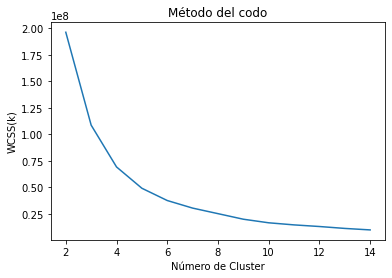

In [27]:
plt.plot(range(2,15),wcss)
plt.title("Método del codo")
plt.xlabel("Número de Cluster")
plt.ylabel("WCSS(k)")
plt.show()

In [28]:
kmeans=KMeans(n_clusters=5,max_iter=300,random_state=42)
y_kmeans=kmeans.fit_predict(vehiculos_pr)

In [30]:
clusters = kmeans.labels_
clusters

array([0, 2, 0, ..., 4, 4, 4])

In [29]:
def resumen_cluster(cluster_id):
    cluster = vehiculos[clusters==cluster_id]
    resumen_cluster = cluster[datos_categoricos.columns].mode().to_dict(orient="records")[0]
    resumen_cluster.update(cluster.mean().to_dict())
    resumen_cluster["cluster_id"] = cluster_id
    return resumen_cluster

def comparar_clusters(*cluster_ids):
    resumenes = []
    for cluster_id in cluster_ids:
        resumenes.append(resumen_cluster(cluster_id))
    return pd.DataFrame(resumenes).set_index("cluster_id").T

In [31]:
resumen_cluster(0)

C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_12360\1258750224.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resumen_cluster.update(cluster.mean().to_dict())


{'clase_tipo': 'Coches pequeños',
 'traccion_tipo': 'dos',
 'transmision_tipo': 'Automatica',
 'combustible_tipo': 'Normal',
 'tamano_motor_tipo': 'grande',
 'consumo_tipo': 'moderado',
 'co2_tipo': 'moderado',
 'year': 1999.8478507280495,
 'desplazamiento': 3.7254250588543125,
 'cilindros': 6.269009417509592,
 'co2': 504.43250389109016,
 'consumo_litros_milla': 0.21447081389283618,
 'cluster_id': 0}

In [32]:
comparar_clusters(*np.unique(clusters))

C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_12360\1258750224.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resumen_cluster.update(cluster.mean().to_dict())
C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_12360\1258750224.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resumen_cluster.update(cluster.mean().to_dict())
C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_12360\1258750224.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resumen_cluster.update(cluste

cluster_id,0,1,2,3,4
clase_tipo,Coches pequeños,Coches pequeños,Camionetas,Camionetas,Coches pequeños
traccion_tipo,dos,dos,dos,dos,dos
transmision_tipo,Automatica,Automatica,Automatica,Automatica,Automatica
combustible_tipo,Normal,Normal,Normal,Normal,Normal
tamano_motor_tipo,grande,pequeño,muy grande,muy grande,muy pequeño
consumo_tipo,moderado,bajo,muy alto,muy alto,muy bajo
co2_tipo,moderado,bajo,muy alto,muy alto,muy bajo
year,1999.847851,2001.606219,1998.751002,1994.563744,2004.267732
desplazamiento,3.725425,2.624529,4.958756,5.63552,1.882468
cilindros,6.269009,4.861761,7.704478,8.595431,4.033966


In [33]:
def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def resumen_grafico_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

In [43]:
cluster_results = kmeans_cluster(vehiculos_pr, 5)
cluster_summary = resumen_grafico_clustering(cluster_results)

In [44]:
cluster_summary

,cilindros,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,co2,co2_tipo_bajo,...,consumo_tipo_muy alto,consumo_tipo_muy bajo,desplazamiento,tamano_motor_tipo_mediano,tamano_motor_tipo_muy grande,tamano_motor_tipo_muy pequeño,tamano_motor_tipo_pequeño,traccion_tipo_dos,transmision_tipo_Manual,year
Cluster,,,,,,,,,,,,,,,,,,,,,
0,6.268986,0.051181,0.077600,0.106722,0.247362,0.176127,0.060162,0.084401,504.432504,0.000000,...,0.001133,0.000000,3.725425,0.330979,0.171855,0.022670,0.110646,0.679833,0.261662,1999.847851
1,4.861948,0.104010,0.047872,0.155974,0.439198,0.137234,0.016285,0.036007,412.696626,0.603928,...,0.000000,0.135761,2.624591,0.278887,0.008920,0.263175,0.349755,0.783306,0.356547,2001.606219
2,7.704478,0.004530,0.033455,0.031364,0.117616,0.184004,0.190451,0.095487,626.708082,0.000000,...,0.942673,0.000000,4.958756,0.082244,0.641052,0.000697,0.009932,0.566301,0.227566,1998.751002
3,8.595431,0.000000,0.042004,0.067060,0.227708,0.044215,0.167281,0.156964,792.167832,0.000000,...,1.000000,0.000000,5.635520,0.020634,0.915991,0.000000,0.002948,0.616802,0.257185,1994.563744
4,4.033966,0.108059,0.018815,0.143190,0.635864,0.079254,0.000333,0.007493,317.817356,0.000000,...,0.000000,0.998168,1.882468,0.031302,0.000000,0.793373,0.174659,0.901099,0.473027,2004.267732


In [47]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [14, 14]

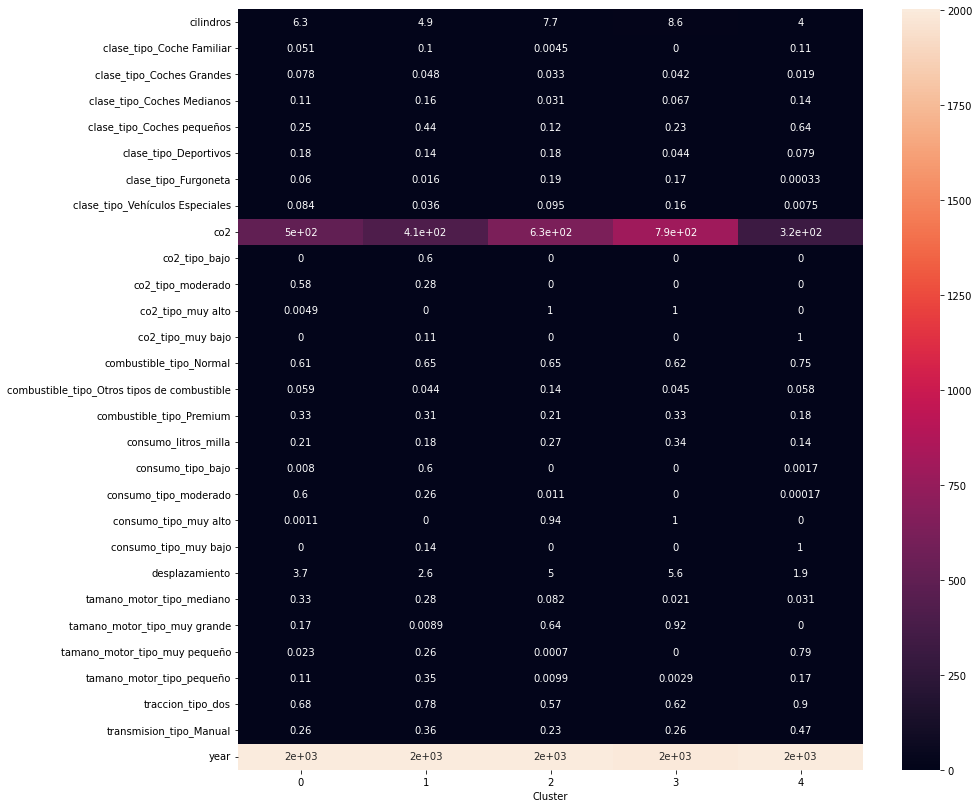

In [48]:
import seaborn as sns
sns.heatmap(cluster_summary.transpose(), annot=True);